# Identifying common themes in football using statistical analysis

## Question or problem definition

We are given positional data of all 22 players and the ball on the football pitch. In this analysis, we intend to analyse different statistics with respect to positions of players on the football pitch and answer some common football related questions through statistical analysis

## Acquire training and testing data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import patches
import numpy as np
%matplotlib inline

data = pd.read_pickle('football/test_data_1.pkl')

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Wrangle, prepare and cleanse the data

The data contains multiple columns of sequences ('sequence_1' to 'sequence_18') of play from actual football games in which each players and the balls positions are recorded

Let us define the columns in the data based on available information: first 22 columns are X,Y positions of defensive players, second 22 columns are X,Y columns of offensive players, last 2 columns are X,Y position of the ball in play

In [2]:
columns = ['GKDef_X', 'GKDef_Y', 'Def1_X', 'Def1_Y','Def2_X', 'Def2_Y','Def3_X', 'Def3_Y','Def4_X', 'Def4_Y','Def5_X', 'Def5_Y', 'Def6_X', 'Def6_Y', 'Def7_X', 'Def7_Y','Def8_X', 'Def8_Y','Def9_X', 'Def9_Y','Def10_X', 'Def10_Y', 'GKAtt_X','GKAtt_Y','Att1_X','Att1_Y','Att2_X','Att2_Y','Att3_X','Att3_Y','Att4_X','Att4_Y','Att5_X','Att5_Y','Att6_X','Att6_Y','Att7_X','Att7_Y','Att8_X','Att8_Y','Att9_X','Att9_Y','Att10_X','Att10_Y','Ball_X','Ball_Y']

Lets make a DataFrame quickly and see where this goes.

In [3]:
test_sequence = 'sequence_1'
df = pd.DataFrame(data[test_sequence], columns = columns)
df.head(5)

,GKDef_X,GKDef_Y,Def1_X,Def1_Y,Def2_X,Def2_Y,Def3_X,Def3_Y,Def4_X,Def4_Y,...,Att7_X,Att7_Y,Att8_X,Att8_Y,Att9_X,Att9_Y,Att10_X,Att10_Y,Ball_X,Ball_Y
0,43.018059,1.379710,-13.374524,24.342030,15.370722,23.849276,8.483840,-10.150724,8.284221,15.078260,...,11.278517,8.08116,-5.489544,14.486957,4.890684,26.411594,0.499049,19.907248,-19.961977,3.843478
1,42.918251,1.379710,-13.274715,24.144928,15.071293,23.652174,8.284221,-10.150724,8.284221,14.881160,...,10.979088,8.08116,-5.589354,14.191304,4.990494,26.411594,0.399240,19.808697,-20.680607,3.863188
2,42.818443,1.379710,-13.274715,23.849276,14.672052,23.455074,7.984791,-10.249275,8.184410,14.486957,...,10.779468,8.08116,-5.788973,13.895652,5.090304,26.411594,0.399240,19.710144,-21.409222,3.892754
3,42.718632,1.379710,-13.274715,23.553623,14.272815,23.257971,7.785172,-10.249275,8.084601,14.191304,...,10.579848,8.08116,-5.988593,13.600000,5.190114,26.411594,0.299430,19.611595,-22.137833,3.922319
4,42.618820,1.281159,-13.174905,23.356522,13.973383,23.060869,7.585552,-10.249275,7.984791,13.895652,...,10.380228,8.08116,-6.088403,13.304348,5.289924,26.510145,0.199620,19.513042,-22.866446,3.951884


## Analyze, identify patterns, and explore the data.


### Visualizing a sequence of play and showing movement of the ball

Let us the use the columns we designed above to convert the data into a DataFrame and display the trajectory of the ball for a test sequence

In [4]:
# Obtaining the positions occupied by the ball
ball_pos = df[['Ball_X','Ball_Y']].values.tolist()
ball_pos[0]

[-19.961977005004883, 3.843478202819824]

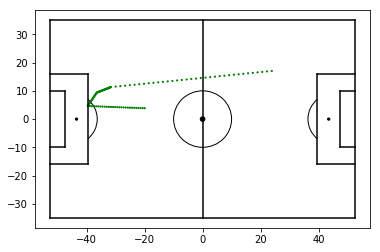

In [5]:
# Plotting the ball along with the position of the ball
# Run with createPitch([]) to just display the pitch
def createPitch(ball_pos, defense_pos, attack_pos, size=0.2):
    #Create figure
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)

    #Pitch Outline & Centre Line
    plt.plot([-52.5,-52.5],[-35,35], color="black")
    plt.plot([-52.5,52.5],[35,35], color="black")
    plt.plot([52.5,52.5],[35,-35], color="black")
    plt.plot([52.5,-52.5],[-35,-35], color="black")
    plt.plot([0,0],[-35,35], color="black")
    
    #Left Penalty Area
    plt.plot([-39.5,-39.5],[16,-16],color="black")
    plt.plot([-52.5,-39.5],[16,16],color="black")
    plt.plot([-39.5,-52.5],[-16,-16],color="black")
    
    #Right Penalty Area
    plt.plot([39.5,39.5],[16,-16],color="black")
    plt.plot([52.5,39.5],[16,16],color="black")
    plt.plot([39.5,52.5],[-16,-16],color="black")
    
    #Left 6-yard Box
    plt.plot([-52.5,-47.5],[-10,-10],color="black")
    plt.plot([-47.5,-47.5],[-10,10],color="black")
    plt.plot([-52.5,-47.5],[10,10],color="black")
    
    #Right 6-yard Box
    plt.plot([52.5,47.5],[-10,-10],color="black")
    plt.plot([47.5,47.5],[-10,10],color="black")
    plt.plot([52.5,47.5],[10,10],color="black")
    
    #Create Arc and add it to our plot
    leftArc = patches.Arc((-45.5,0),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
    rightArc = patches.Arc((45.5,0),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

    
    #Assign circles to variables - do not fill the centre circle!
    centreCircle = plt.Circle((0,0),10,color="black",fill=False)
    centreSpot = plt.Circle((0,0),0.8,color="black")
    leftPenSpot = plt.Circle((-43.5,0),0.4, color="black")
    rightPenSpot = plt.Circle((43.5,0),0.4, color="black")
    
    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)

    #Draw the circles to our plot
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)
    
    # Plotting the ball
    for pos in attack_pos:
        locBall = plt.Circle((pos[0],pos[1]),size,color="red")
        ax.add_patch(locBall)
    for pos in defense_pos:
        locBall = plt.Circle((pos[0],pos[1]),size,color="blue")
        ax.add_patch(locBall)
    for pos in ball_pos:
        locBall = plt.Circle((pos[0],pos[1]),size,color="green")
        ax.add_patch(locBall)
    
        
createPitch(ball_pos, [], [])

### Visualizing a sequence of football play with the ball and the players

Here we can create the dataframe with all the sequences available to us. We can see here that the dataset is split into a number of sequences, so we need to wrangle the data into a dataframe with columns for the positions of all the players on the field and the ball.

In [6]:
positions = []
new_cols = columns + ['seq']
for seq in data:
    for d_seq in data[seq]:
        seq_list = d_seq.tolist()
        seq_list.append(seq)
        positions.append(seq_list)
df_data = pd.DataFrame(positions, columns = new_cols)
set(df_data['seq'])

{'sequence_1',
 'sequence_10',
 'sequence_11',
 'sequence_12',
 'sequence_13',
 'sequence_14',
 'sequence_15',
 'sequence_16',
 'sequence_17',
 'sequence_18',
 'sequence_19',
 'sequence_2',
 'sequence_20',
 'sequence_21',
 'sequence_22',
 'sequence_23',
 'sequence_24',
 'sequence_25',
 'sequence_26',
 'sequence_27',
 'sequence_28',
 'sequence_29',
 'sequence_3',
 'sequence_30',
 'sequence_31',
 'sequence_32',
 'sequence_33',
 'sequence_34',
 'sequence_35',
 'sequence_36',
 'sequence_37',
 'sequence_38',
 'sequence_4',
 'sequence_5',
 'sequence_6',
 'sequence_7',
 'sequence_8',
 'sequence_9'}

Here we split the dataframe into each of its sequences and make an list containing the DataFrames for each sequence called 'sequenced_data'

In [7]:
df_data.seq = df_data.seq.apply(lambda x: int(x.strip('sequence_')))
sequences = list(set(df_data.seq))
grp = df_data.groupby('seq')
sequenced_data = []
for sequence in sequences:
    sequenced_data.append(grp.get_group(sequence))
sequenced_data[0].head(5)

,GKDef_X,GKDef_Y,Def1_X,Def1_Y,Def2_X,Def2_Y,Def3_X,Def3_Y,Def4_X,Def4_Y,...,Att7_Y,Att8_X,Att8_Y,Att9_X,Att9_Y,Att10_X,Att10_Y,Ball_X,Ball_Y,seq
3162,43.018059,1.379710,-13.374524,24.342030,15.370722,23.849276,8.483840,-10.150724,8.284221,15.078260,...,8.08116,-5.489544,14.486957,4.890684,26.411594,0.499049,19.907248,-19.961977,3.843478,1
3163,42.918251,1.379710,-13.274715,24.144928,15.071293,23.652174,8.284221,-10.150724,8.284221,14.881160,...,8.08116,-5.589354,14.191304,4.990494,26.411594,0.399240,19.808697,-20.680607,3.863188,1
3164,42.818443,1.379710,-13.274715,23.849276,14.672052,23.455074,7.984791,-10.249275,8.184410,14.486957,...,8.08116,-5.788973,13.895652,5.090304,26.411594,0.399240,19.710144,-21.409222,3.892754,1
3165,42.718632,1.379710,-13.274715,23.553623,14.272815,23.257971,7.785172,-10.249275,8.084601,14.191304,...,8.08116,-5.988593,13.600000,5.190114,26.411594,0.299430,19.611595,-22.137833,3.922319,1
3166,42.618820,1.281159,-13.174905,23.356522,13.973383,23.060869,7.585552,-10.249275,7.984791,13.895652,...,8.08116,-6.088403,13.304348,5.289924,26.510145,0.199620,19.513042,-22.866446,3.951884,1


Trying to wrangle the (x,y) positions of the ball, defense and attacking players and return them as list

In [8]:
def parse_data(data, seq):
    df = data[seq]
    defense = []
    attack = []
    ball = []
    defense.append(df[['GKDef_X','GKDef_Y']].values.tolist())
    defense.append(df[['Def1_X','Def1_Y']].values.tolist())
    defense.append(df[['Def2_X','Def2_Y']].values.tolist())
    defense.append(df[['Def3_X','Def3_Y']].values.tolist())
    defense.append(df[['Def4_X','Def4_Y']].values.tolist())
    defense.append(df[['Def5_X','Def5_Y']].values.tolist())
    defense.append(df[['Def6_X','Def6_Y']].values.tolist())
    defense.append(df[['Def7_X','Def7_Y']].values.tolist())
    defense.append(df[['Def8_X','Def8_Y']].values.tolist())
    defense.append(df[['Def9_X','Def9_Y']].values.tolist())
    defense.append(df[['Def10_X','Def10_Y']].values.tolist())
    attack.append(df[['GKAtt_X','GKAtt_Y']].values.tolist())
    attack.append(df[['Att1_X','Att1_Y']].values.tolist())
    attack.append(df[['Att2_X','Att2_Y']].values.tolist())
    attack.append(df[['Att3_X','Att3_Y']].values.tolist())
    attack.append(df[['Att4_X','Att4_Y']].values.tolist())
    attack.append(df[['Att5_X','Att5_Y']].values.tolist())
    attack.append(df[['Att6_X','Att6_Y']].values.tolist())
    attack.append(df[['Att7_X','Att7_Y']].values.tolist())
    attack.append(df[['Att8_X','Att8_Y']].values.tolist())
    attack.append(df[['Att9_X','Att9_Y']].values.tolist())
    attack.append(df[['Att10_X','Att10_Y']].values.tolist())
    ball = df[['Ball_X','Ball_Y']].values.tolist()
    def_list = []
    att_list = []
    for i in range (0,11):
        def_list = def_list + defense[i]
        att_list = att_list + attack[i]
        
    return def_list, att_list, ball

Now let us display the sequence in action

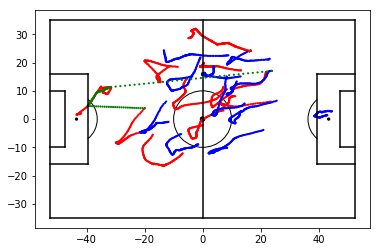

In [9]:
list_defense, list_attack, list_ball = parse_data(sequenced_data,0)
createPitch(list_ball, list_defense, list_attack)

Nice! To my trained eye, here we are visualizing a defender passing the ball back to the goalkeeper for a long kick towards a striker/midfielder, the dotted lines look like passes

### Analyzing the distance between attacking and defensive players

Here we are visualizing an entire complex sequence of play which leads to a shot, let us see how the defensive team does on keeping up with the attacking team

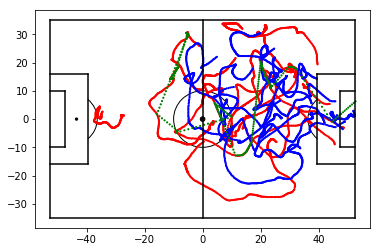

In [10]:
list_defense, list_attack, list_ball = parse_data(sequenced_data,1)
createPitch(list_ball, list_defense, list_attack)

In [11]:
len(list_defense), len(list_attack), len(list_ball), len(list_defense)/11, len(list_attack)/11

(3498, 3498, 318, 318.0, 318.0)

Now as we can see, the list_defense and list_attack lists have 318 positional markers for each player in the defense and attack respectively. And this 318 corresponds to a single sequence of play, which is 318 timesteps long

In [12]:
import math

def get_distances(defense, attack, ball):
    def_players = np.array_split(defense, 11)
    att_players = np.array_split(attack, 11)
    #print(len(def_players))
    #print(len(att_players))
    player_dist = []
    # i is corresponding to each player on each team 0 is GK
    for i in range(0,11):
        d = def_players[i]
        a = att_players[i]
        b = ball
        distances = []
        # j is corresponding to the sequence number
        for j in range(len(b)):
            #def_att_dist = math.sqrt(math.pow((d[j][0] - a[j][0]),2) + math.pow((d[j][1] - a[j][1]),2))
            def_ball_dist = math.sqrt(math.pow((d[j][0] - b[j][0]),2) + math.pow((d[j][1] - b[j][1]),2))
            att_ball_dist = math.sqrt(math.pow((a[j][0] - b[j][0]),2) + math.pow((a[j][1] - b[j][1]),2))
            distances.append((i, j, def_ball_dist, att_ball_dist))
        player_dist.append(distances)
    
    return player_dist

player_game_plot = get_distances(list_defense, list_attack, list_ball)
len(player_game_plot)

11

### Looking at player's movement with respect to the ball

Here I am making an assumption that the players are arranged in the data to be players of similar nature. This plot is to see if similar players in different teams have similar patterns of movement with respect to the ball

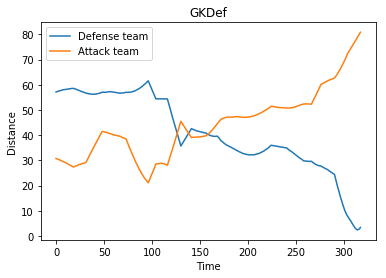

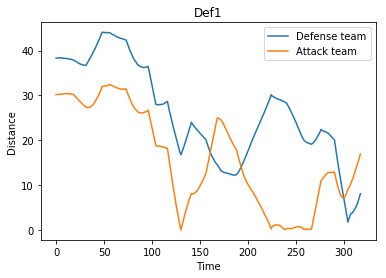

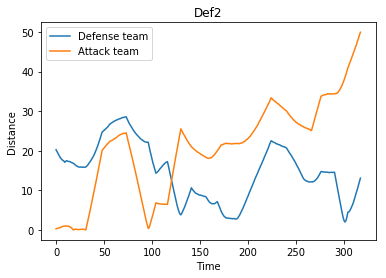

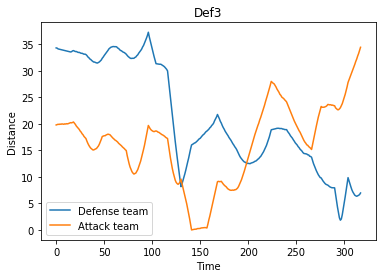

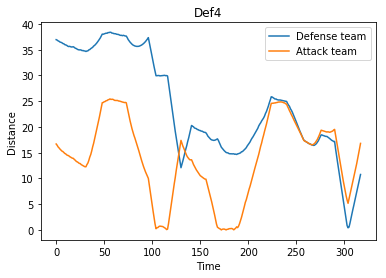

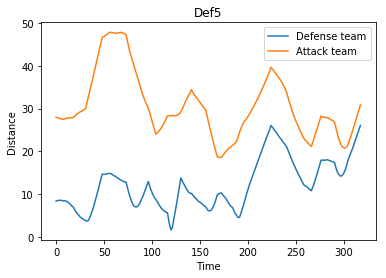

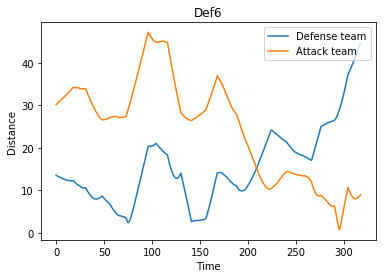

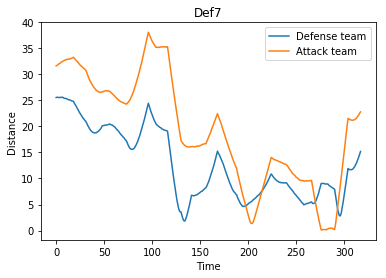

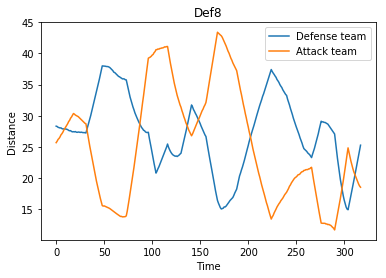

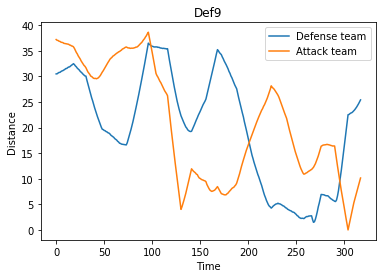

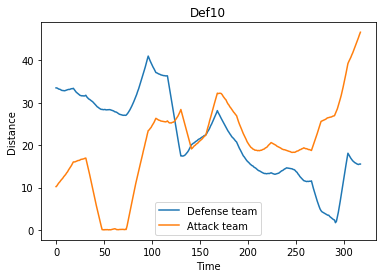

In [13]:
def plot_player_ball_dist(player_game_plot, i):
    player_df = pd.DataFrame(player_game_plot[i], columns = ['player', 'seq_num','def_ball','att_ball'])
    player_df = player_df.drop(['seq_num','player'],axis=1)
    #def_att = plt.plot(player_df['def_att'], label='def_att')
    def_ball = plt.plot(player_df['def_ball'], label='Defense team')
    att_ball = plt.plot(player_df['att_ball'], label='Attack team')
    #plt.legend(handles=[def_att, def_ball, att_ball])
    #print(columns[2*i].split('_')[0])
    plt.title(columns[2*i].split('_')[0])
    plt.xlabel('Time')
    plt.ylabel('Distance')
    plt.legend()
    plt.show()

for i in range(len(player_game_plot)):
    plot_player_ball_dist(player_game_plot,i)

### Possession Stats

Let us find out how much each player possesses the ball throughout the sequence of play from players on each team

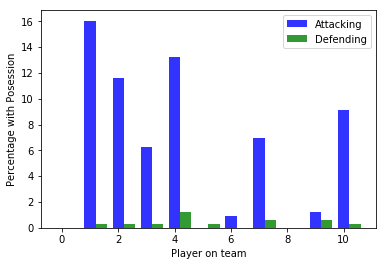

In [14]:
player_ppa = []
player_ppd = []
for i in range(0,11):
    player_df = pd.DataFrame(player_game_plot[i], columns = ['player', 'seq_num','def_ball','att_ball'])
    # Adding values to each team ppa = attacking ppd = defending
    player_ppa.append((player_df[player_df['att_ball'] < 2].seq_num.count()/len(player_game_plot[i]))*100)
    player_ppd.append((player_df[player_df['def_ball'] < 2].seq_num.count()/len(player_game_plot[i]))*100)

# create plot
fig, ax = plt.subplots()
index = np.arange(0,11)
bar_width = 0.4
opacity = 0.8
 
rects1 = plt.bar(index, player_ppa, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Attacking')
 
rects2 = plt.bar(index + bar_width, player_ppd, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Defending')

plt.xlabel("Player on team")
plt.ylabel("Percentage with Posession")
plt.legend()
plt.show()

This a general trend to see attacking team keeps the ball from the defensive team, we can see here that there were clearly 6 attacking players strongly involved with the play and 2 other players were minorly involed. 6/10 outfield players indicates a sequence of play is pretty balanced attack

## Finding out if a sequence is a goal 

I'm looking to define a function here which says whether a sequence leads to a goal, so let us see if we can define a function like that and see if we can visualize a goal in action through our pitch visualization

In [15]:
def isGoal(sequence):
    seq = sequence[-1]
    #print(seq)
    if (((-39.5 < seq[0] < -52.5) or (39.5 < seq[0] < 52.5)) and ((-4 < seq[1] < 4))):
        return True
    else:
        return False
isGoal(list_ball)

False

Well this one seems to be a close miss, but are there any other goals in this data

In [16]:
for i in range(len(sequenced_data)):
    list_def, list_att, list_ball = parse_data(sequenced_data,i)
    print(isGoal(list_ball))

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
True
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
True


Alright we can display the last one which looks like a True. Wow, a classic counterattack leading to a goal. So our function seems to work in finding a goal.

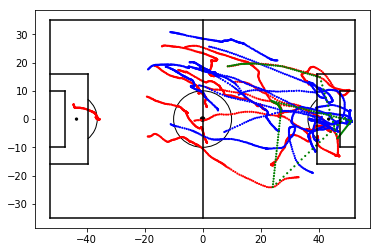

In [17]:
createPitch(list_ball, list_def, list_att)

## Attacking position - distance from Goal

Here I am taking the positions of the attacking team and finding the distance from goal for each player and plotting them as a bar chart, having some fun with colors along with that

In [18]:
def dist(x, y):
    return math.sqrt(math.pow((x[0] - y[0]),2) + math.pow((x[1] - y[1]),2))

In [19]:
def attackingPosition(attack):
    att_players = np.array_split(attack, 11)
    distance = []
    # For each sequence time j
    for j in range(len(att_players[0])):
        # for each player on the attacking team k = 1 to 11
        for k in range(11):
            # Add the distances of the players on the attacking team to the goal
            player_dist = min(dist([52.5,-4], att_players[k][j]),dist([52.5,4], att_players[k][j]))
            distance.append((j,k,player_dist))
    
    return distance

att_positions = attackingPosition(list_att)
att_values = pd.DataFrame(att_positions, columns = ['time', 'player', 'dist'])
players = att_values.groupby(['player']).mean()

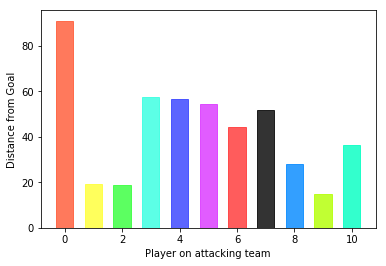

In [20]:
def plotDistanceFromGoal(player_distances):
    ig, ax = plt.subplots()
    index = np.arange(0,11)
    bar_width = 0.6
    opacity = 0.8

    dist = plt.bar(index, player_distances, bar_width,
                     alpha=opacity,
                     label='Attacking team')
    # Some fun with colors
    colors = ["#FF5733", "#FFFF33", "#33FF39", "#33FFE0", "#333FFF", "#DA33FF", "#FF3333", "#000000", "#0087FF", "#B2FF00", "#00FFC1"]
    i = 0
    for color in colors:
        dist[i].set_color(color)
        i+=1
    plt.xlabel("Player on attacking team")
    plt.ylabel("Distance from Goal")
    plt.show()
plotDistanceFromGoal(players['dist'])

### Defensive position - Marking

Let us now look at how good the defensive players are at marking their opponent, here I am assuming that the only metric of marking is the distance from the closest player of the attacking team, which clearly inaccurate but just bear with me here. This part of the analysis is to see similarities in play between different players of the same defensive team on how they react to the attack

In [21]:
def closestPlayerDist(defense, attack):
    def_players = np.array_split(defense, 11)
    att_players = np.array_split(attack, 11)
    distance = []
    # For each sequence time j
    for j in range(len(def_players[0])):
        # for each player on the defensive team k
        for k in range(11):
            # Add the distances of the players on the attacking team to the list
            player_dist = [dist(def_players[k][j], att_players[i][j]) for i in range(11)]
            distance.append((j,k,player_dist))
    
    return distance

distances = closestPlayerDist(list_def, list_att)

Now let us plot the distances of the closest attacking players to see how the defense reacts to this play

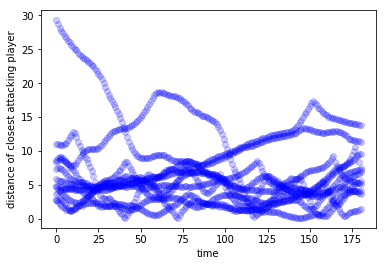

In [22]:
def plotdist(distances):
    distances_2 = [(distances[i][0], distances[i][1], distances[i][2][np.argmin(distances[i][2])]) for i in range(len(distances))]
    x = [distances_2[i][0] for i in range(len(distances_2))]
    y = [distances_2[i][2] for i in range(len(distances_2))]
    plt.plot(x,y,'bo', alpha=0.2)
    plt.ylabel('distance of closest attacking player')
    plt.xlabel('time')
    
plotdist(distances)

Now let us plot the mean and median of this data and see how the defense distances from their closest attacking players vary, lower medians reflect closer attacking players, lower means reflect defensive player's positions being closer to the closest attacking player

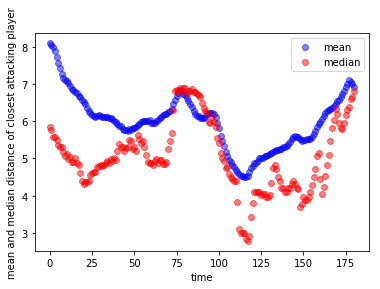

In [39]:
def plotmeans(distances):
    distances_2 = [(distances[i][0], distances[i][1], distances[i][2][np.argmin(distances[i][2])]) for i in range(len(distances))]
    values = pd.DataFrame(distances_2, columns = ['time', 'player', 'dist'])
    means = values.groupby(['time']).mean()
    medians = values.groupby(['time']).median()
    fig, ax = plt.subplots()
    x = [i for i in range(len(means))]
    ax.plot(x,means.dist,'bo', alpha=0.5)
    ax.plot(x,medians.dist,'ro', alpha=0.5)
    ax.legend(['mean','median'])
    plt.ylabel('mean and median distance of closest attacking player')
    plt.xlabel('time')
    
    plt.show()

plotmeans(distances)

Here I intend to show how the variance of the data drops, the variance of the data indicates more variation in the distances between players of the defensive team and their chosen marker, this shows how players are adapting to the changes of attacking players, as more variance indicates greater variation of the distance from the closest attacking player, which can indicate change of marked player

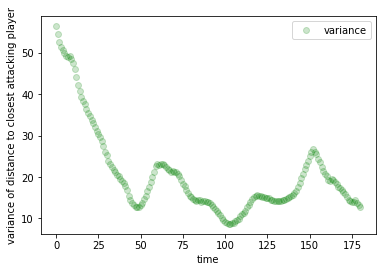

In [24]:
def plotvariance(distances):
    distances_2 = [(distances[i][0], distances[i][1], distances[i][2][np.argmin(distances[i][2])]) for i in range(len(distances))]
    values = pd.DataFrame(distances_2, columns = ['time', 'player', 'dist'])
    variance = values.groupby(['time']).var()
    fig, ax = plt.subplots()
    x = [i for i in range(len(variance))]
    ax.plot(x,variance.dist,'go', alpha=0.2)
    ax.legend(['variance'])
    plt.ylabel('variance of distance to closest attacking player')
    plt.xlabel('time')
    
    plt.show()

plotvariance(distances)

Here I am getting the percentage of time in the sequence of play each defensive player has marked a specific attacking player

In [25]:
distances_3 = [(distances[i][0], distances[i][1], np.argmin(distances[i][2])) for i in range(len(distances))]

In [26]:
marking = pd.DataFrame(distances_3, columns = ['time', 'player', 'att_player'])
marking = marking.groupby(['player','att_player']).count().sort_values(by='time', ascending=False)
marking.time = (marking.time/(len(distances)/11))*100
marking

,,time
player,att_player,
2,2,98.895028
5,1,97.237569
10,4,97.237569
6,1,87.845304
1,5,83.977901
3,1,59.116022
7,8,55.801105
0,9,55.248619
4,5,50.276243


Here we have the defensive players that have consistently been in close proximity to only one attacking player through the sequence. This is probably due to marking because the defensive players have marked their opponent tightly.

## Model, predict and solve the problem

Since we have now looked at a single sequence of play and analyzed it, let us look at the dataseet as a whole. Here we are going to assume that the entire dataset is from a single game.

### Heat map of players positions
Here we are going to build a heatmap of the player's positions and display it on a color grid heatmap

Here we would be mapping our player positions to a grid and adding +1 to the location on the grid each time a player occupies the related position on the pitch

In [27]:
def parse_sequence(values, data):
    round_data = [(round(x[0]),round(x[1])) for x in data]
    for r in round_data:
        a = r[0] + 52
        b = r[1] + 35
        values[b,a] += 1
        

Converting entire dataset into a list of player positions and ball positions

In [28]:
values = np.zeros((71,107))
ball = np.zeros((71,107))
for i in range(len(sequenced_data)):
    list_defense, list_attack, list_ball = parse_data(sequenced_data,i)
    parse_sequence(values, list_defense)
    parse_sequence(values, list_attack)
    parse_sequence(ball, list_ball)

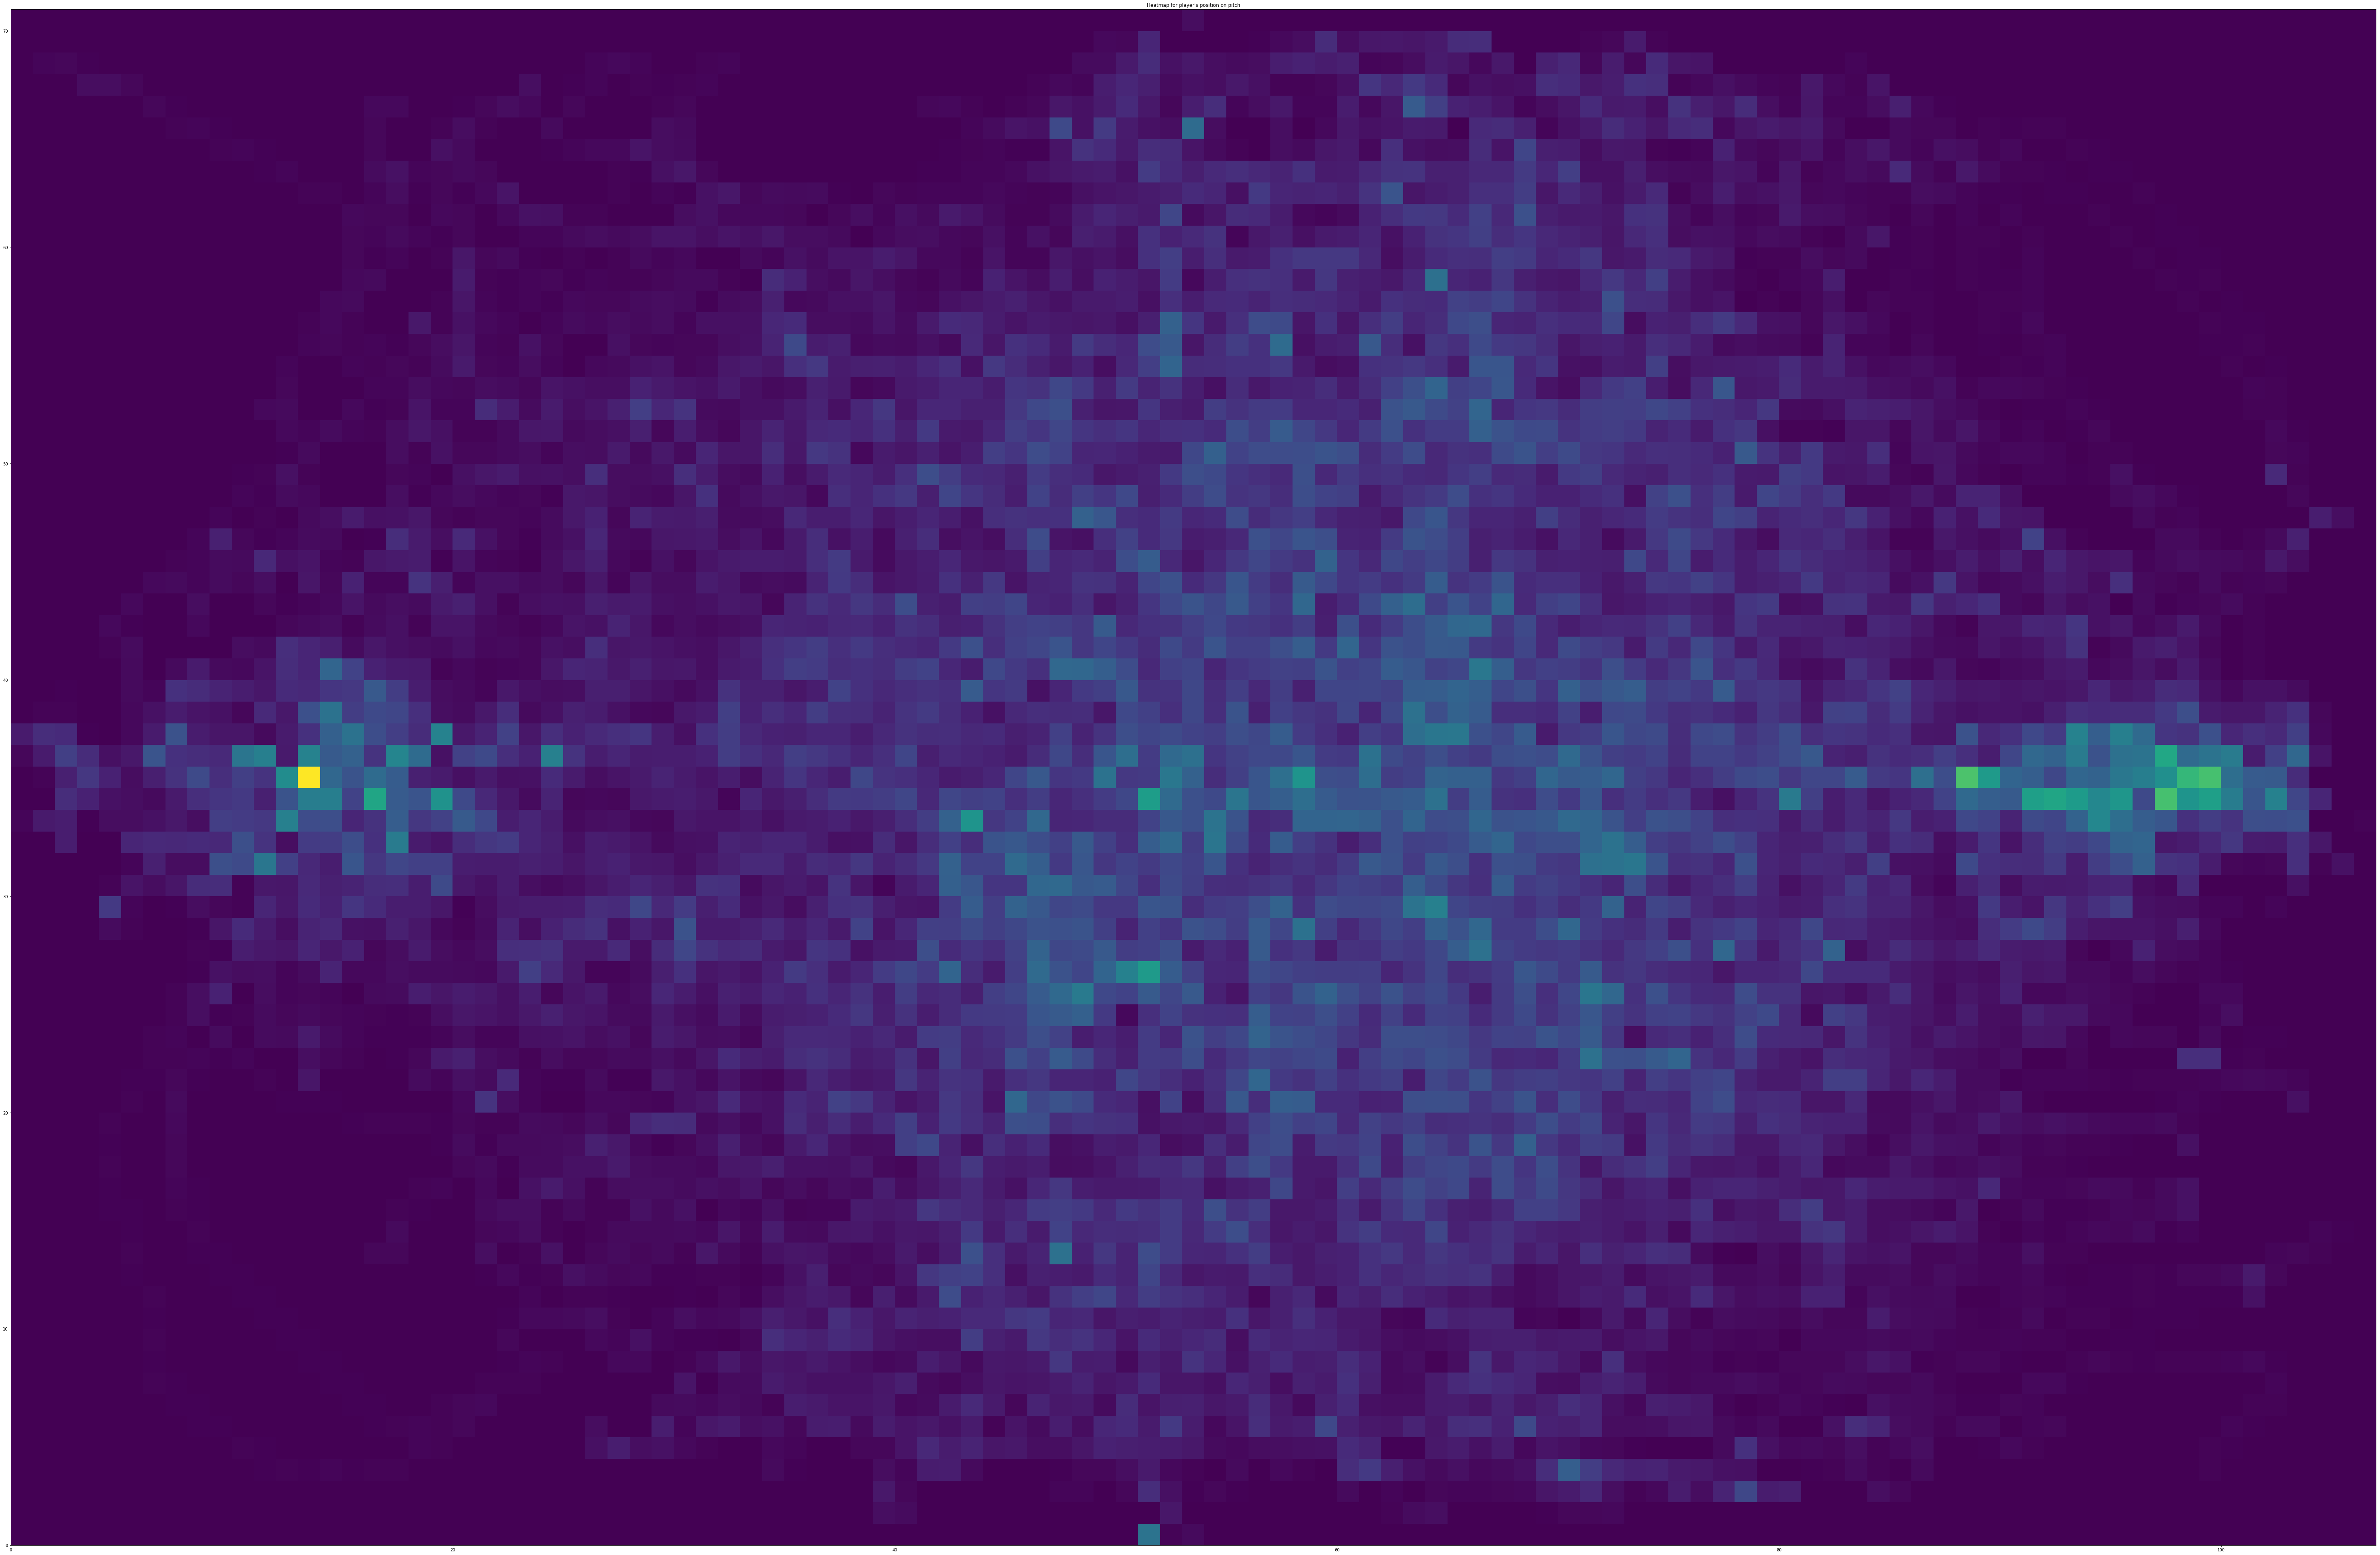

In [43]:
def createGrid(values, title_str):
    v = np.asarray(values)
    fig = plt.gcf()
    fig.set_size_inches(105, 70)
    plt.pcolor(v)
    plt.title(title_str)
    plt.legend()
    plt.show()
createGrid(values, "Heatmap for player's position on pitch")

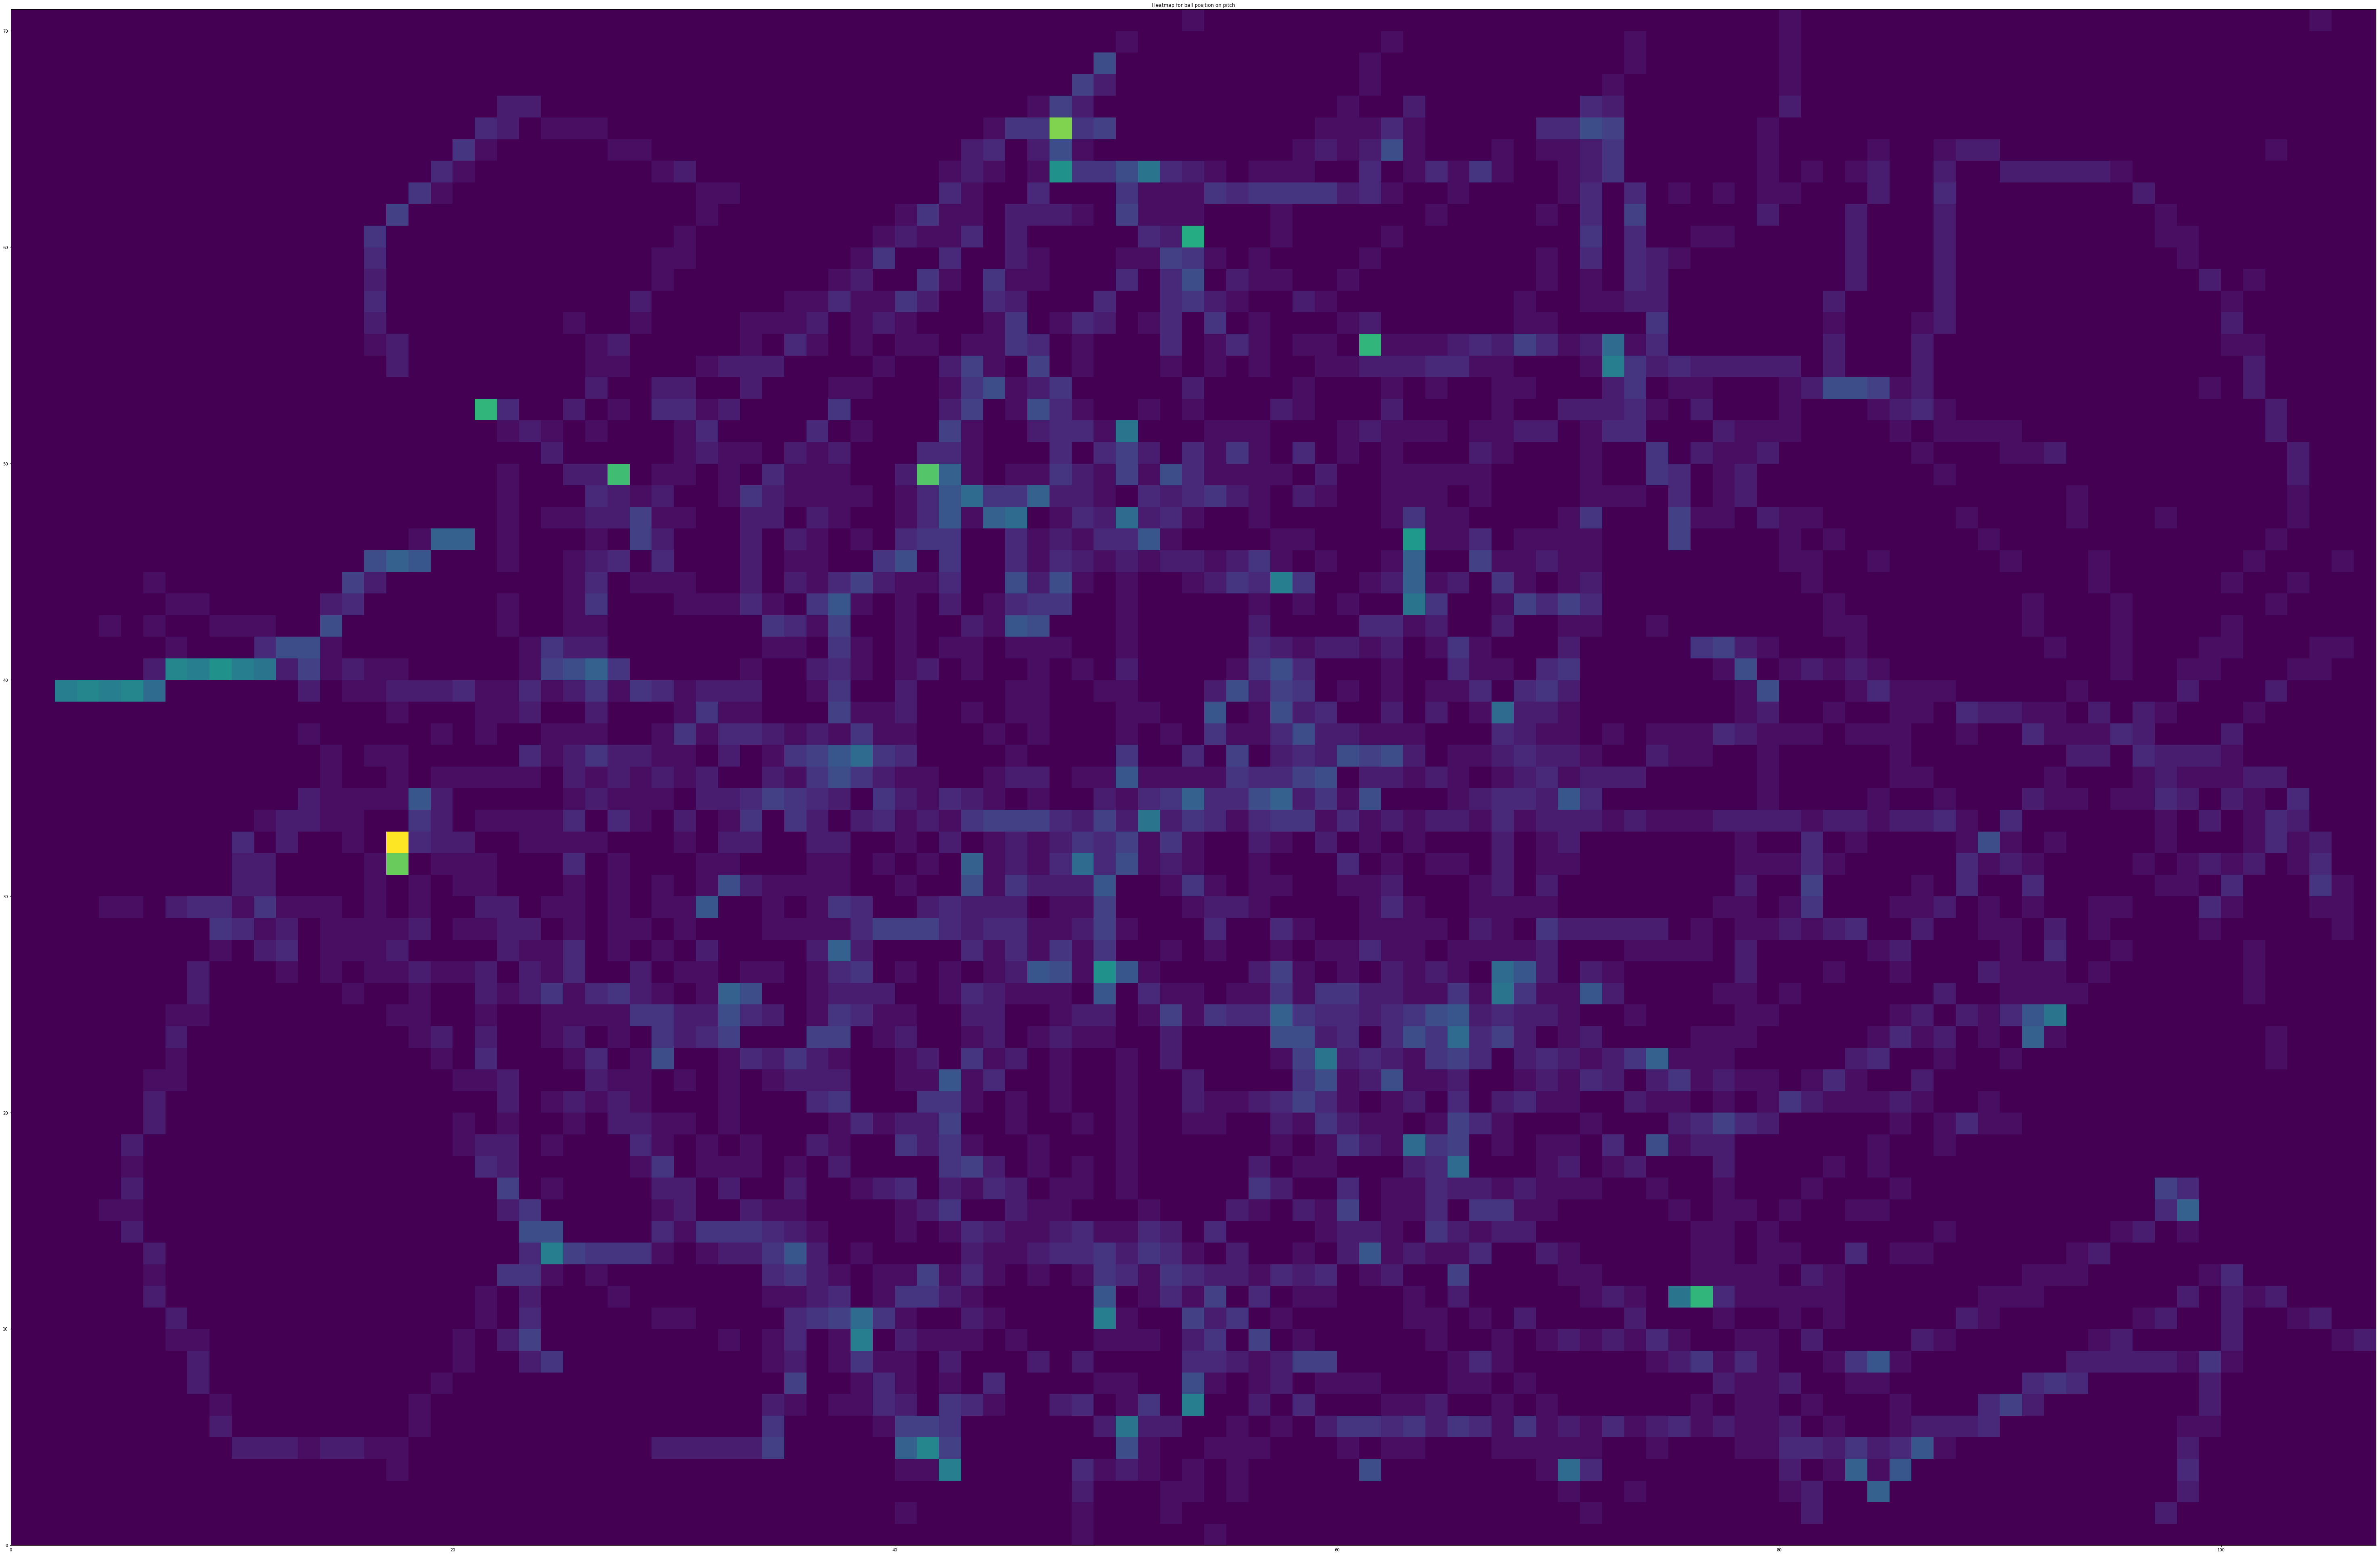

In [44]:
createGrid(ball, "Heatmap for ball position on pitch")

## KMeans clustering on the data - Formations and Important positions on pitch

Now let us try do to some KMeans clustering on this data which with 11 clusters would give the centroid of players positions taken up in the field, giving us a idea of the formation of each team. 

In [31]:
from sklearn.cluster import KMeans

list_def = []
list_att = []
list_bll = []
for i in range(len(sequenced_data)):
    list_defense, list_attack, list_ball = parse_data(sequenced_data,i)
    list_def = list_def + list_defense
    list_att = list_att + list_attack
    list_bll = list_bll + list_ball

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


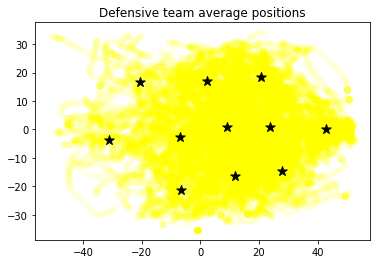

In [32]:
def plotKMeans(train, data, title_str, k=11):
    # Number of clusters
    kmeans = KMeans(n_clusters=k)
    # Fitting the input data
    kmeans = kmeans.fit(train)
    # Getting the cluster labels
    labels = kmeans.predict(data)
    # Centroid values
    centroids = kmeans.cluster_centers_
    def xy(lst):
        x = [l[0] for l in lst]
        y = [l[1] for l in lst]
        return x, y
    x, y = xy(data)
    fig, ax = plt.subplots()
    if (title_str[0] == 'D'):
        ax.scatter(x, y, marker='o', color='#ffff00', alpha=0.03)
    else:
        ax.scatter(x, y, marker='o', color='#00ffff', alpha=0.03)

    ax.scatter(centroids[:,0], y=centroids[:,1], marker='*', c='#050505', s=100)
    plt.title(title_str)
    plt.legend()
    plt.show()
    return centroids

def_average_pos = plotKMeans(list_def, list_def, "Defensive team average positions")

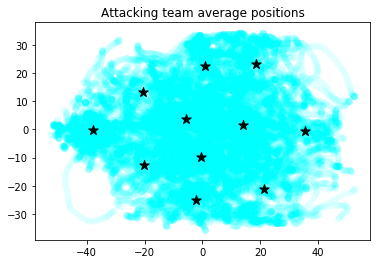

In [33]:
att_average_pos = plotKMeans(list_att, list_att, "Attacking team average positions")

Now let us look at how these positions differ when adjusted for ball positions

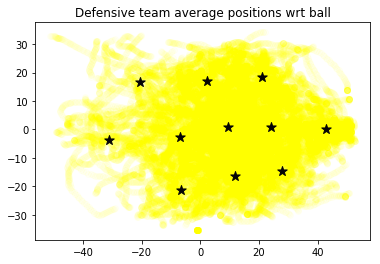

array([[ 42.72336594,   0.30016136],
       [ -6.58636878, -21.13629123],
       [  9.28765686,   0.83658764],
       [ -6.88513353,  -2.6495986 ],
       [ 27.93082703, -14.70189556],
       [  2.16582657,  16.89875479],
       [-30.99076818,  -3.56463152],
       [-20.50220424,  16.68574416],
       [ 11.77006243, -16.27075145],
       [ 20.91328934,  18.38011585],
       [ 23.96732981,   0.76056578]])

In [34]:
plotKMeans(list_def+list_ball, list_def, "Defensive team average positions wrt ball")

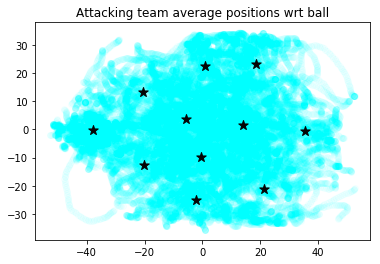

array([[-37.97455914,  -0.25015131],
       [ 13.95418753,   1.55808834],
       [ 18.60640287,  23.11071774],
       [ -5.70234717,   3.84783413],
       [-20.16624413, -12.46797254],
       [ -2.19058863, -25.1579225 ],
       [ 21.19446792, -21.016923  ],
       [  0.74293478,  22.35991954],
       [ -0.48166413,  -9.77654683],
       [ 35.47754269,  -0.50764737],
       [-20.56231166,  13.23862908]])

In [35]:
plotKMeans(list_att+list_ball, list_att, "Attacking team average positions wrt ball")

Now let us find out the locations on the pitch with the most activity

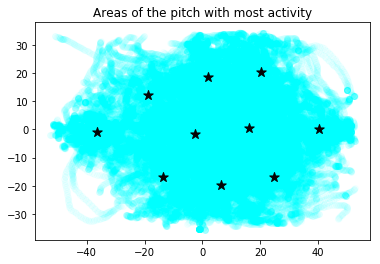

array([[ -2.49387773,  -1.70687129],
       [ 40.33620627,   0.11973235],
       [-36.46237578,  -1.07591224],
       [  1.87751602,  18.50773682],
       [ 24.58432582, -16.74932879],
       [ 16.13617537,   0.57150575],
       [  6.38437235, -19.85225495],
       [-18.78894867,  12.26909839],
       [ 20.27820347,  20.24989843],
       [-13.5243006 , -16.71630994]])

In [36]:
plotKMeans(list_def+list_att, list_def+list_att, "Areas of the pitch with most activity", 10)

## Formations

Here I am plotting the centroids from the KMeans clustering performed for each team's positions. Let us see how they line up next to each other

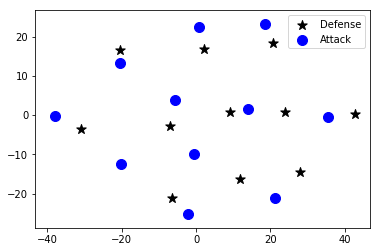

In [37]:
plt.scatter(def_average_pos[:,0], y=def_average_pos[:,1], marker='*', c='black', s=100, label="Defense")
plt.scatter(att_average_pos[:,0], y=att_average_pos[:,1], marker='o', c='blue', s=100, label="Attack")
plt.legend()
plt.show()

Nice! To my trained eye, I can see a defense lining up as 3-3-3-1 formation vs attack lining up as 4-2-3-1 formation with the full-backs pushed up higher, let me display that on a pitch

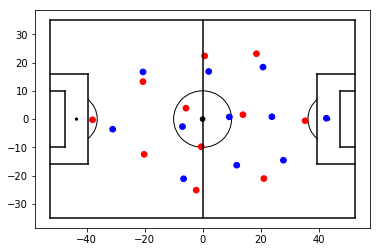

In [38]:
createPitch([], def_average_pos, att_average_pos, 1)

## The End

It was a challenging dataset to work with, but we came up with some interesting results at the end. I ended up doing an analysis on how the players moved with respect to the ball, with respect to the opposing team, analyzed positions occupied on the pitch and also came up with formations of different teams. I look forward to your comments on this notebook and suggest more 